<a href="https://colab.research.google.com/github/Emjeeey/ITBA-3205_HumanTraffickingINDIA/blob/main/404_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Emjeeey/ITBA-3205_HumanTraffickingINDIA.git


In [ ]:
!pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib==3.1.3

In [86]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
#understanding the data

In [40]:
data = '/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/2019_victims_trafficked.xlsx'
VictimsTrafficked2019 = pd.read_excel(data)


In [ ]:
VictimsTrafficked2019.info()

In [ ]:
VictimsTrafficked2019.describe()

In [ ]:
VictimsTrafficked2019.head()

In [ ]:
VictimsTrafficked2019.tail()

In [ ]:
VictimsTrafficked2019.shape

In [ ]:
VictimsTrafficked2019.columns

In [ ]:
VictimsTrafficked2019.nunique()

In [ ]:
VictimsTrafficked2019.isnull().sum()

In [ ]:
#cleaning the data

In [ ]:
#assigning filters  for 0 values

In [47]:
df= pd.DataFrame(VictimsTrafficked2019)

In [ ]:
filt1 = (df['Male'] == 0 ) & (df['Female'] == 0 ) & (df['Total_victims_trafficked'] == 0 )

In [ ]:
df.loc[filt1]

In [48]:
df.drop((df.index[df['Male'] == 0]) & (df.index[df['Female'] == 0]) & (df.index[df['Total_victims_trafficked'] == 0])  , inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


In [49]:
CleanVT = df.drop(['region type' ], axis=1)

In [ ]:
CleanVT.info()

In [ ]:
CleanVT.describe()

In [ ]:
CleanVT.mean()

In [ ]:
CleanVT

In [ ]:
#CleanVT is variable for the cleaned data for victims in 2019

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

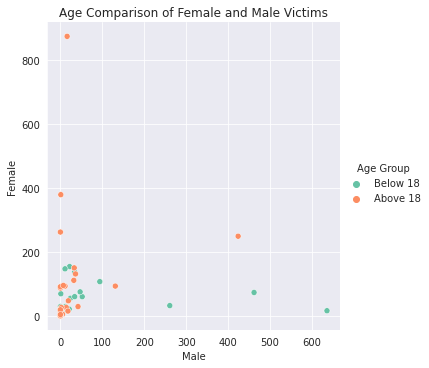

In [57]:
sns.set_style(style="darkgrid")
sns.relplot(x="Male", y="Female", hue="Age Group", data=CleanVT)
plt.title("Age Comparison of Female and Male Victims")
from google.colab import files
plt.savefig('Age Comparison of Female and Male Victims.png',dpi=300)
files.download('Age Comparison of Female and Male Victims.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

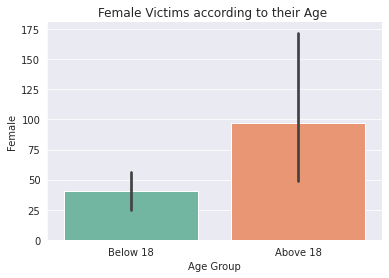

In [56]:
sns.set_style(style="darkgrid")
sns.set_palette('Set2')
sns.barplot(x='Age Group', y= 'Female', data= CleanVT)

plt.title("Female Victims according to their Age ")
sns.despine()
from google.colab import files
plt.savefig('Female Victims according to their Age .png',dpi=300)
files.download('Female Victims according to their Age .png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

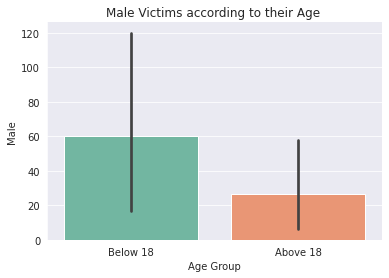

In [58]:
sns.set_style(style="darkgrid")
sns.barplot(x='Age Group', y= 'Male', data= CleanVT)

plt.title("Male Victims according to their Age ")
sns.despine()
from google.colab import files
plt.savefig('Male Victims according to their Age.png',dpi=300)
files.download('Male Victims according to their Age.png')

In [ ]:
#dataset for Purpose of trafficking

In [7]:
df = pd.read_csv (r'/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/Purpose of Trafficking.csv')
print(df)

                  Purpose of Trafficking  Total person
0                         Forced Labour           1141
1  Sexual Exploitation for Prostitution           2080
2                    Domestic Servitude            364
3                       Forced Marriage            227
4                          Petty Crimes             13
5                               Begging             68
6                     Removal of Organs              4
7                         Other reasons           2674
8                                    NaN          6571


In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [9]:
dfRow=df.drop(7)
dfRow1=dfRow.drop(4)
dfRow2=dfRow1.drop(6)


In [ ]:
#cleaning the data and dropping the columns that have 0 values

In [10]:
df1 = dfRow2.dropna()
df1

,Purpose of Trafficking,Total person
0,Forced Labour,1141
1,Sexual Exploitation for Prostitution,2080
2,Domestic Servitude,364
3,Forced Marriage,227
5,Begging,68


In [ ]:
df1.info()

In [ ]:
df1.describe()

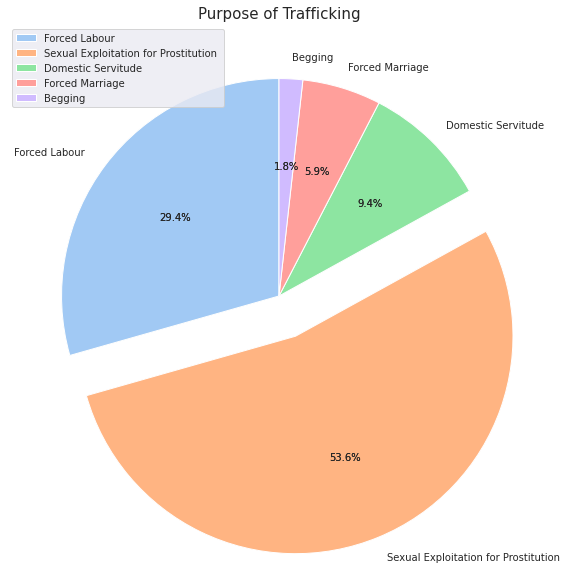

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 720x720 with 0 Axes>

In [91]:
from IPython.core.pylabtools import figsize
data = df1['Total person']
labels = df1['Purpose of Trafficking']

colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(15,8))
explode = (0,0.2,0,0,0)
ax.pie(data, explode=explode, labels=labels,autopct='%1.1f%%',
        frame=True, startangle=90,radius= 1)
patches, texts, auto = ax.pie(data, colors=colors,  startangle=90,explode=explode, autopct='%1.1f%%' )
 

plt.legend(patches, labels, loc="best",fontsize=10)
fig= plt.gcf()
fig.set_size_inches(10,10)
plt.title("Purpose of Trafficking",fontsize= 15)


plt.show()

from google.colab import files
plt.savefig("Purpose of Trafficking.png",dpi=300)
files.download("Purpose of Trafficking.png")

In [ ]:
sns.set_style(style="darkgrid")

In [62]:
df3 = pd.read_csv (r'/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/Male_and_female_victims_of_trafficking_for_sexual_exploitation_over_time.csv')
print(df3)

    yearofregistration  Male  Female
0                 2002    80      91
1                 2003    94      81
2                 2004     3      59
3                 2005     0      52
4                 2006     1      46
5                 2007     2      52
6                 2008     3      52
7                 2009     4      43
8                 2010     0      37
9                 2011     2      36
10                2012     3      17
11                2013     5      27
12                2014     7      14
13                2015    10      72
14                2016     8      43
15                2017    20      71
16                2018    45      76
17                2019   100      51


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

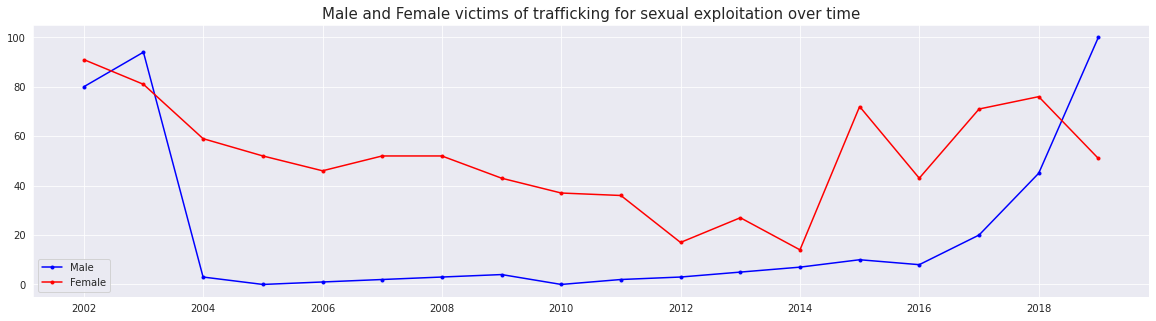

In [61]:
df3['yearofregistration']=pd.to_datetime(df3['yearofregistration'], format='%Y')
plt.figure(figsize=(20,5))
plt.title('Male and Female victims of trafficking for sexual exploitation over time',fontsize= 15)
plt.plot(df3.yearofregistration, df3.Male,'b.-',label='Male')
plt.plot(df3.yearofregistration, df3.Female,'r.-',label= 'Female')


plt.legend()
from google.colab import files
plt.savefig('Male and Female victims of trafficking for sexual exploitation over time.png',dpi=300)
files.download('Male and Female victims of trafficking for sexual exploitation over time.png')

In [ ]:
df4 = pd.read_csv (r'/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/Male_and_female_victims_of_trafficking_for_labour_exploitation_who_are_children.csv')
print(df4)

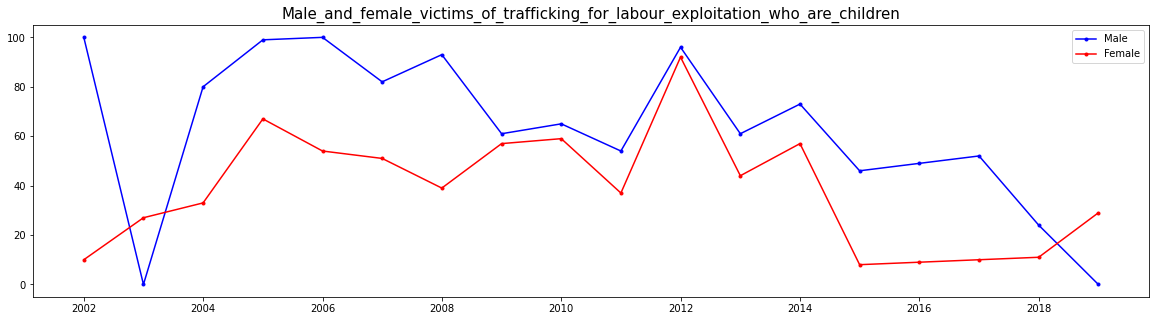

In [44]:
year= df4['yearofregistration']=pd.to_datetime(df4['yearofregistration'], format='%Y')

plt.figure(figsize=(20,5))
plt.title('Male_and_female_victims_of_trafficking_for_labour_exploitation_who_are_children',fontsize=15)
plt.plot(year, df4.Male,'b.-',label='Male')
plt.plot(year, df4.Female,'r.-',label= 'Female')
#print(df4.yearofregistration[1::2])

plt.legend()

In [36]:
df5 = pd.read_csv (r'/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/Means of control used on female victims.csv')
print(df5)


              Means of control  Female
0                 Debt bondage      18
1               Takes earnings      30
2   Restricts financial access       2
3                      Threats      38
4          Psychological abuse      44
5               Physical abuse      35
6                 Sexual abuse      19
7               False promises      31
8      Psychoactive substances      17
9           Restricts movement      44
10      Restricts medical care      13
11     Excessive working hours      22
12               Uses children       2
13   Threat of law enforcement       9
14       Withholds necessities      16
15         Withholds documents      23
16                 Other means      18


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

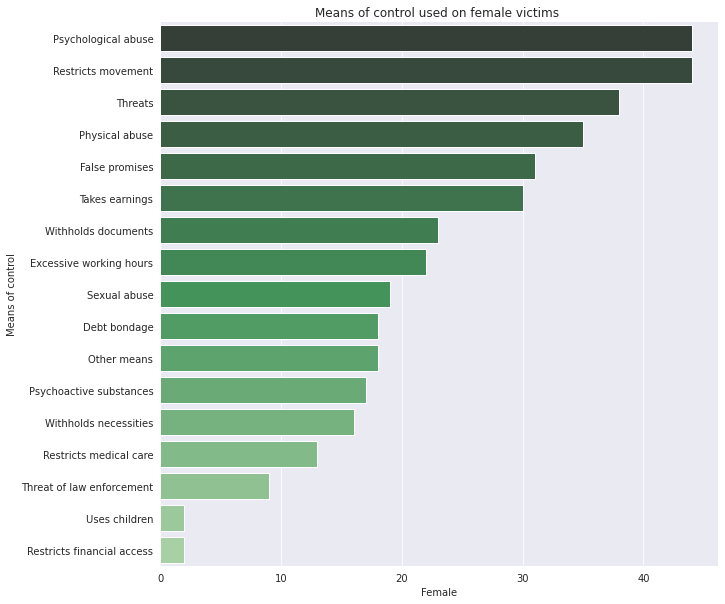

In [73]:
df5 = df5.sort_values(['Female'], ascending=False).reset_index(drop=True)
pal = sns.color_palette("Greens_d", len(df5))

sns.barplot(x='Female', y= 'Means of control', data= df5,palette=np.array(pal[::-1]))

plt.title("Means of control used on female victims ")
sns.despine()
from google.colab import files
plt.savefig('Means of control used on female victims.png',dpi=300, bbox_inches='tight')
files.download('Means of control used on female victims.png')

In [ ]:
df6 = pd.read_csv (r'/content/ITBA-3205_HumanTraffickingINDIA/Human Trafficking dataset/Means of control used on male victims.csv')
print(df6)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

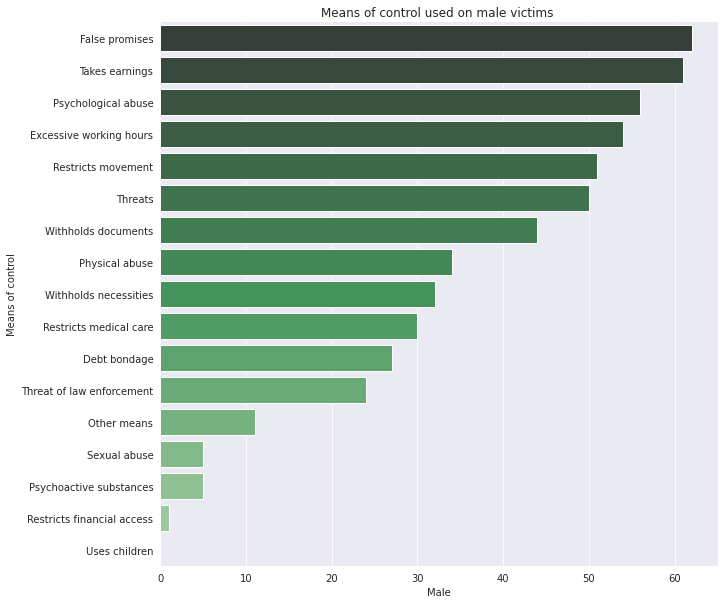

In [72]:
df6= df6.sort_values(['Male'], ascending=False).reset_index(drop=True)
plt.figure(figsize(10,10))
pal = sns.color_palette("Greens_d", len(df5))
sns.barplot(x='Male', y= 'Means of control', data= df6,palette=np.array(pal[::-1]))

plt.title("Means of control used on male victims ")
sns.despine()
from google.colab import files
plt.savefig('Means of control used on male victims.png',dpi=300, bbox_inches='tight')
files.download('Means of control used on male victims.png')